In [ ]:
import pandas as pd

# Mengambil hanya 'Sheet1' (berdasarkan nama)
df = pd.read_excel('survey_fix.xlsx', sheet_name='Sheet1')

# Atau menggunakan indeks (0 adalah sheet pertama)
# df = pd.read_excel('survey_fix.xlsx', sheet_name=0)

print(df.head())

                                     gmaps  \
0  0.012294525036680203,109.29295637422888   
1  0.009034650000000002,109.29889819999998   
2  0.008740998840660402,109.29890238420168   
3  0.008960233003002303,109.29850111920736   
4  0.008772981467637646,109.29723094613973   

                                            geometry         Info  \
0  MULTIPOLYGON (((109.2928315 0.0133555, 109.293...  bus_station   
1  MULTIPOLYGON (((109.2987809 0.0090484, 109.298...       reskom   
2  MULTIPOLYGON (((109.2987715 0.0089157, 109.299...       reskom   
3  MULTIPOLYGON (((109.2982458 0.0089934, 109.298...       reskom   
4  MULTIPOLYGON (((109.2972654 0.0087896, 109.297...       reskom   

          Desa                  Kecamatan            Kota  \
0  Batu Layang  Kecamatan Pontianak Utara  Kota Pontianak   
1  Batu Layang  Kecamatan Pontianak Utara  Kota Pontianak   
2  Batu Layang  Kecamatan Pontianak Utara  Kota Pontianak   
3  Batu Layang  Kecamatan Pontianak Utara  Kota Pontianak   
4  

In [ ]:
# Mengambil kolom ke-5 sampai ke-24
# Penulisan 4:24 berarti mulai dari indeks 4 (kolom ke-5)
# sampai sebelum indeks 24 (kolom ke-24)
df_hasil = df.iloc[:, 4:24]

# Menampilkan hasil dalam bentuk tabel
print(df_hasil)

In [ ]:
# 1. Mengambil nilai unik dari setiap kolom dan menggabungkannya menjadi string
ringkasan = []

for col in df_hasil.columns:
    # Mengambil nilai unik, menghapus NaN (opsional), dan mengubah ke string
    # .dropna() digunakan agar output lebih bersih tanpa tulisan 'nan' yang berulang
    unique_vals = df_hasil[col].dropna().unique().astype(str)

    # Menggabungkan nilai unik dengan koma
    isi_nilai = ", ".join(unique_vals) if len(unique_vals) > 0 else "Semua NaN"

    ringkasan.append({'Kolom': col, 'Nilai': isi_nilai})

# 2. Membuat DataFrame baru dari list ringkasan
df_nilai = pd.DataFrame(ringkasan)

# 3. Menampilkan hasil
print(df_nilai)

In [ ]:
# Menyimpan df_nilai ke file CSV baru
df_nilai.to_csv('ringkasan_data.csv', index=False)

# All Columns NaN

In [ ]:
# 1. Pilih subset kolom 5 sampai 24 (indeks 4 hingga 23)
subset = df.iloc[:, 4:24]

# 2. Cek baris mana yang SEMUA nilainya adalah Null/NaN
# axis=1 artinya kita mengecek secara horizontal (per baris)
baris_kosong = df[subset.isnull().all(axis=1)]

# 3. Tampilkan hasilnya
print(f"Jumlah baris yang kolom 5-24 nya kosong semua: {len(baris_kosong)}")

# Jika ingin melihat datanya (misal 5 baris pertama)
print(baris_kosong)

Jumlah baris yang kolom 5-24 nya kosong semua: 3
          osm_id    osm_way_id name_left          type aeroway amenity  \
2913         NaN  8.087941e+08       NaN           NaN     NaN     NaN   
30543        NaN  1.415227e+09       NaN           NaN     NaN     NaN   
49284  8831139.0           NaN       NaN  multipolygon     NaN     NaN   

       admin_level  barrier  boundary building  ...  shop  sport tourism  \
2913           NaN      NaN       NaN      NaN  ...   NaN    NaN     NaN   
30543          NaN      NaN       NaN      NaN  ...   NaN    NaN     NaN   
49284          NaN      NaN       NaN      NaN  ...   NaN    NaN     NaN   

                      other_tags  \
2913   "description"=>"Shipyard"   
30543    "highway"=>"pedestrian"   
49284                        NaN   

                                                geometry            Kota  \
2913   MULTIPOLYGON (((109.298059 0.006952, 109.29869...  Kota Pontianak   
30543  MULTIPOLYGON (((109.340304 -0.021756, 109.340

In [ ]:
pip install geopandas shapely folium

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import folium

# 1. Konversi kolom string MULTIPOLYGON menjadi objek geometri beneran
# Ganti 'geometry' dengan nama kolom yang sesuai di df Anda
baris_kosong['geometry'] = baris_kosong['geometry'].apply(wkt.loads)

# 2. Ubah DataFrame biasa menjadi GeoDataFrame
gdf = gpd.GeoDataFrame(baris_kosong, geometry='geometry', crs="EPSG:4326")

# 3. Buat peta dasar (center di koordinat pertama data Anda)
# Ambil koordinat centroid untuk memposisikan kamera peta
centroid = gdf.geometry.iloc[0].centroid
m = folium.Map(location=[centroid.y, centroid.x], zoom_start=18)

# 4. Tambahkan layer Citra Satelit (Google Satellite atau Esri)
folium.TileLayer(
    tiles='https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
    attr='Google',
    name='Google Satellite',
    overlay=False,
    control=True
).add_to(m)

# 5. Tambahkan poligon dari GeoDataFrame ke peta
folium.GeoJson(gdf).add_to(m)

# 6. Tampilkan peta
m

/tmp/ipython-input-4137096456.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Building ind

In [ ]:
# Mencari baris yang kolom building-nya berisi string 'ind' secara eksak
df_ind = df[df['building'] == 'ind']

# Melihat hasilnya
print(df_ind)

       osm_id   osm_way_id name_left type aeroway amenity  admin_level  \
16237     NaN  573228342.0       NaN  NaN     NaN     NaN          NaN   
16239     NaN  573228370.0       NaN  NaN     NaN     NaN          NaN   
16331     NaN  573449387.0       NaN  NaN     NaN     NaN          NaN   
16332     NaN  573449388.0       NaN  NaN     NaN     NaN          NaN   

       barrier  boundary building  ...  shop  sport tourism  other_tags  \
16237      NaN       NaN      ind  ...   NaN    NaN     NaN         NaN   
16239      NaN       NaN      ind  ...   NaN    NaN     NaN         NaN   
16331      NaN       NaN      ind  ...   NaN    NaN     NaN         NaN   
16332      NaN       NaN      ind  ...   NaN    NaN     NaN         NaN   

                                                geometry            Kota  \
16237  MULTIPOLYGON (((109.29052 -0.017035, 109.29066...  Kota Pontianak   
16239  MULTIPOLYGON (((109.29048 -0.016897, 109.29062...  Kota Pontianak   
16331  MULTIPOLYGON (((10

In [ ]:
# 1. Konversi kolom string MULTIPOLYGON menjadi objek geometri beneran
# Ganti 'geometry' dengan nama kolom yang sesuai di df Anda
df_ind['geometry'] = df_ind['geometry'].apply(wkt.loads)

# 2. Ubah DataFrame biasa menjadi GeoDataFrame
gdf = gpd.GeoDataFrame(df_ind, geometry='geometry', crs="EPSG:4326")

# 3. Buat peta dasar (center di koordinat pertama data Anda)
# Ambil koordinat centroid untuk memposisikan kamera peta
centroid = gdf.geometry.iloc[0].centroid
mm = folium.Map(location=[centroid.y, centroid.x], zoom_start=18)

# 4. Tambahkan layer Citra Satelit (Google Satellite atau Esri)
folium.TileLayer(
    tiles='https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
    attr='Google',
    name='Google Satellite',
    overlay=False,
    control=True
).add_to(mm)

# 5. Tambahkan poligon dari GeoDataFrame ke peta
folium.GeoJson(gdf).add_to(mm)

# 6. Tampilkan peta
mm

/tmp/ipython-input-1615516639.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import plotly.express as px
import pandas as pd
from shapely import wkt

# 1. Pastikan kolom geometry dikonversi (jika belum)
if isinstance(df_ind['geometry'].iloc[0], str):
    df_ind['geometry'] = df_ind['geometry'].apply(wkt.loads)

# 2. Ambil koordinat titik tengah (Centroid) untuk scatter plot
# Kita buat kolom Latitude dan Longitude terpisah agar ringan
df_ind['lat'] = df_ind['geometry'].apply(lambda x: x.centroid.y)
df_ind['lon'] = df_ind['geometry'].apply(lambda x: x.centroid.x)

# 3. Buat Scatter Mapbox
fig = px.scatter_mapbox(
    df_ind,
    lat="lat",
    lon="lon",
    hover_name="building", # Muncul saat kursor menunjuk titik
    zoom=15,
    height=600
)

# 4. Atur Style ke 'open-street-map' (Sangat ringan, tidak perlu API Key)
fig.update_layout(
    mapbox_style="open-street-map",
    margin={"r":0,"t":0,"l":0,"b":0}
)

fig.show()

/tmp/ipython-input-1575043314.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-1575043314.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Building Yes

In [ ]:
import pandas as pd
import numpy as np

# 1. Tentukan range index kolom (indeks 4 sampai 23)
all_indices = list(range(4, 24))

# 2. Ambil indeks untuk kolom building (kolom ke-10 adalah indeks 9)
building_idx = 9

# 3. Buat list indeks untuk kolom yang harus dicek kosongnya (exclude building)
# Kita menghapus indeks 9 dari list all_indices
check_indices = [i for i in all_indices if i != building_idx]

# 4. Filter data dengan logika:
# - Kolom building (indeks 9) bernilai 'yes'
# - Kolom lainnya di range tersebut (check_indices) semuanya Null/NaN
kondisi_building = df.iloc[:, building_idx] == 'yes'
kondisi_kosong = df.iloc[:, check_indices].isnull().all(axis=1)

# Gabungkan kedua kondisi (AND)
baris_terpilih = df[kondisi_building & kondisi_kosong]

# 5. Tampilkan hasil
print(f"Jumlah baris sesuai kriteria: {len(baris_terpilih)}")
print(baris_terpilih.head())

Jumlah baris sesuai kriteria: 55115
   osm_id   osm_way_id name_left type aeroway amenity  admin_level  barrier  \
1     NaN  522379685.0       NaN  NaN     NaN     NaN          NaN      NaN   
2     NaN  522379686.0       NaN  NaN     NaN     NaN          NaN      NaN   
3     NaN  522379687.0       NaN  NaN     NaN     NaN          NaN      NaN   
4     NaN  522379870.0       NaN  NaN     NaN     NaN          NaN      NaN   
5     NaN  522379871.0       NaN  NaN     NaN     NaN          NaN      NaN   

   boundary building  ...  shop  sport tourism  other_tags  \
1       NaN      yes  ...   NaN    NaN     NaN         NaN   
2       NaN      yes  ...   NaN    NaN     NaN         NaN   
3       NaN      yes  ...   NaN    NaN     NaN         NaN   
4       NaN      yes  ...   NaN    NaN     NaN         NaN   
5       NaN      yes  ...   NaN    NaN     NaN         NaN   

                                            geometry            Kota  \
1  MULTIPOLYGON (((109.298781 0.009048, 109.

In [ ]:
import plotly.express as px
import pandas as pd
from shapely import wkt

# 1. Pastikan kolom geometry dikonversi (jika belum)
if isinstance(baris_terpilih['geometry'].iloc[0], str):
    baris_terpilih['geometry'] = baris_terpilih['geometry'].apply(wkt.loads)

# 2. Ambil koordinat titik tengah (Centroid) untuk scatter plot
# Kita buat kolom Latitude dan Longitude terpisah agar ringan
baris_terpilih['lat'] = baris_terpilih['geometry'].apply(lambda x: x.centroid.y)
baris_terpilih['lon'] = baris_terpilih['geometry'].apply(lambda x: x.centroid.x)

# 3. Buat Scatter Mapbox
fig = px.scatter_mapbox(
    baris_terpilih,
    lat="lat",
    lon="lon",
    hover_name="building", # Muncul saat kursor menunjuk titik
    zoom=15,
    height=600
)

# 4. Atur Style ke 'open-street-map' (Sangat ringan, tidak perlu API Key)
fig.update_layout(
    mapbox_style="open-street-map",
    margin={"r":0,"t":0,"l":0,"b":0}
)

fig.show()

/tmp/ipython-input-26673850.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-26673850.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-26673850.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



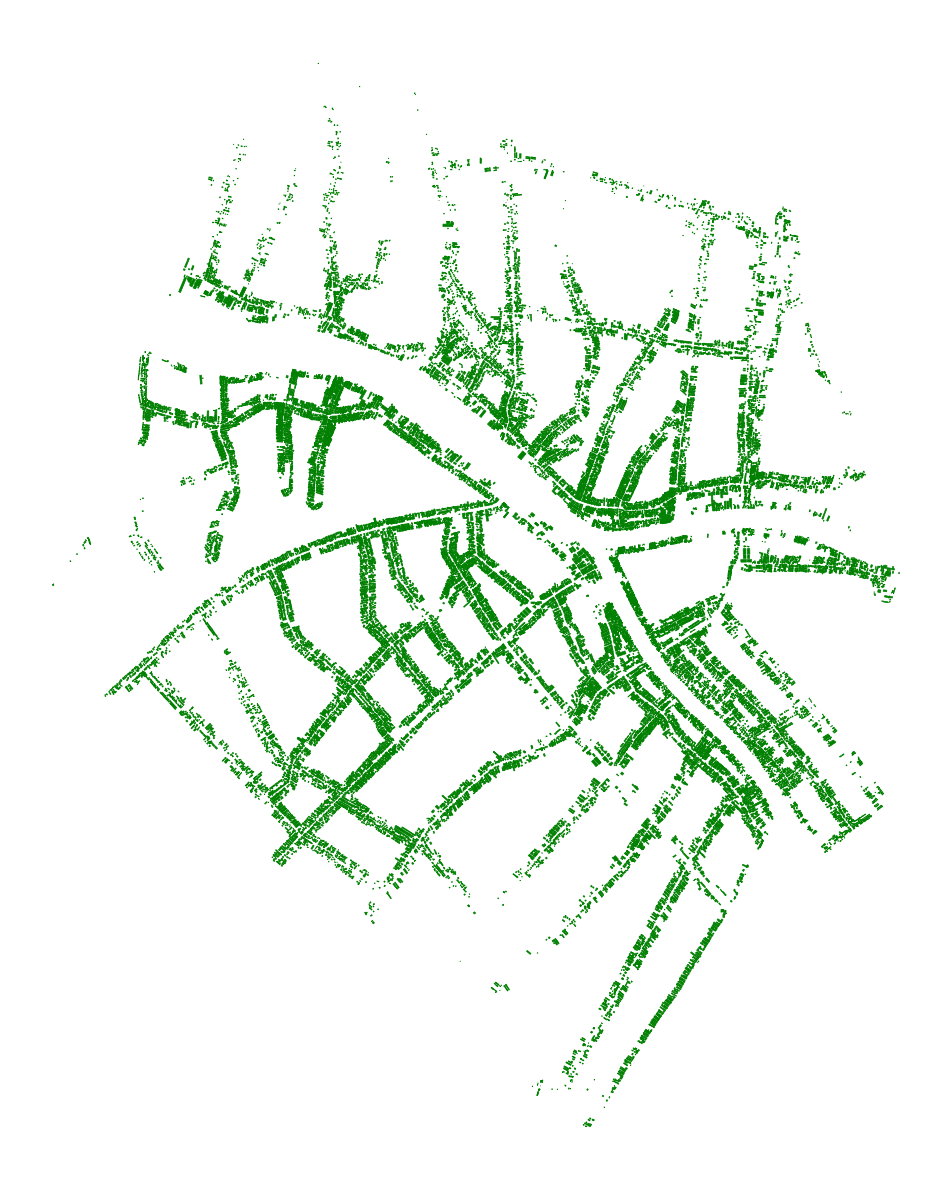

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt

# 1. Konversi kolom 'geometry' dari String WKT ke objek Geometri (jika belum)
# Kita cek baris pertama untuk memastikan tipenya
if isinstance(baris_terpilih['geometry'].iloc[0], str):
    baris_terpilih['geometry'] = baris_terpilih['geometry'].apply(wkt.loads)

# 2. Ubah DataFrame Pandas menjadi GeoDataFrame
gdf = gpd.GeoDataFrame(baris_terpilih, geometry='geometry')

# 3. Proses Visualisasi
# Kita buat figure tanpa frame/background map
fig, ax = plt.subplots(figsize=(12, 12))

# Plot poligon
# color: warna isi, edgecolor: warna garis tepi
gdf.plot(ax=ax, color='green', edgecolor='green', linewidth=0.5)

# 4. Menghilangkan background dan sumbu (axis)
ax.set_axis_off()
plt.axis('off')

# Simpan atau tampilkan
plt.tight_layout()
plt.savefig('visualisasi_poligon.png', transparent=True, dpi=300)
plt.show()

# OTHERS

In [ ]:
# Mencari baris yang kolom building-nya berisi string 'ind' secara eksak
df_ot = df[(df['Kategori'] == 'Komersial dan Industri')&(df["Kecamatan"] == "Kecamatan Pontianak Kota")]

# Melihat hasilnya
print(df_ot)

                                          gmaps  \
16561   -0.01676845355004931,109.33288077378555   
16582  -0.019502749999997345,109.32636344999999   
16584            -0.01973585,109.32482759999999   
16592   -0.01969543337952522,109.32503006077145   
16709  -0.020482585104103324,109.32106713275623   
16710          -0.020485549999999998,109.320935   
24190  -0.028877985775440748,109.29912355138752   
24224    -0.02075340529041994,109.3209933861829   
24777   -0.02942921225550659,109.32618143628818   
24778   -0.02929128786719753,109.32631076107046   
24779    -0.028980341185336926,109.326605058595   
24780            -0.02917055,109.32648784999999   
24781  -0.028793916100505752,109.32652824837643   
26275   -0.02763917971885765,109.32029799468786   
27674   -0.028744032414432876,109.2993488693114   
29955  -0.027416859360045162,109.34154288208559   
32084  -0.031140133436909367,109.29702553978548   
32331   -0.03511304941074969,109.30691868366537   
33818   -0.04647455779043417,10

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import folium

# 1. Konversi kolom string MULTIPOLYGON menjadi objek geometri beneran
# Ganti 'geometry' dengan nama kolom yang sesuai di df Anda
df_ot['geometry'] = df_ot['geometry'].apply(wkt.loads)

# 2. Ubah DataFrame biasa menjadi GeoDataFrame
gdf = gpd.GeoDataFrame(df_ot, geometry='geometry', crs="EPSG:4326")

# 3. Buat peta dasar (center di koordinat pertama data Anda)
# Ambil koordinat centroid untuk memposisikan kamera peta
centroid = gdf.geometry.iloc[0].centroid
m = folium.Map(location=[centroid.y, centroid.x], zoom_start=18)

# 4. Tambahkan layer Citra Satelit (Google Satellite atau Esri)
folium.TileLayer(
    tiles='https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
    attr='Google',
    name='Google Satellite',
    overlay=False,
    control=True
).add_to(m)

# 5. Tambahkan poligon dari GeoDataFrame ke peta
folium.GeoJson(gdf).add_to(m)

# 6. Tampilkan peta
m

/tmp/ipython-input-3101689178.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import plotly.express as px
import pandas as pd
from shapely import wkt

# 1. Pastikan kolom geometry dikonversi (jika belum)
if isinstance(df_ot['geometry'].iloc[0], str):
    df_ot['geometry'] = df_ot['geometry'].apply(wkt.loads)

# 2. Ambil koordinat titik tengah (Centroid) untuk scatter plot
# Kita buat kolom Latitude dan Longitude terpisah agar ringan
df_ot['lat'] = df_ot['geometry'].apply(lambda x: x.centroid.y)
df_ot['lon'] = df_ot['geometry'].apply(lambda x: x.centroid.x)

# 3. Buat Scatter Mapbox
fig = px.scatter_mapbox(
    df_ot,
    lat="lat",
    lon="lon",
    hover_name="Info", # Muncul saat kursor menunjuk titik
    zoom=15,
    height=600
)

# 4. Atur Style ke 'open-street-map' (Sangat ringan, tidak perlu API Key)
fig.update_layout(
    mapbox_style="open-street-map",
    margin={"r":0,"t":0,"l":0,"b":0}
)

fig.show()

/tmp/ipython-input-4227551910.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-4227551910.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# GITULAH POKOKNYA

In [ ]:
!pip install cartopy contextily

In [ ]:
dff = pd.read_excel('survey_v1.xlsx')

In [ ]:
dff['geometry'] = dff['geometry'].apply(wkt.loads)

gdf = gpd.GeoDataFrame(dff, geometry='geometry', crs="EPSG:4326")

index 27820, gmaps = -0.02135,109.33853


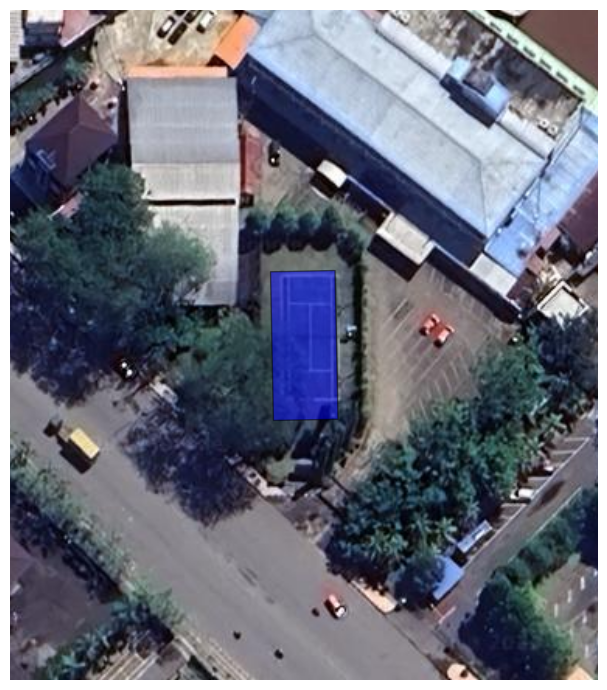

index 34092, gmaps = -0.03444,109.3196


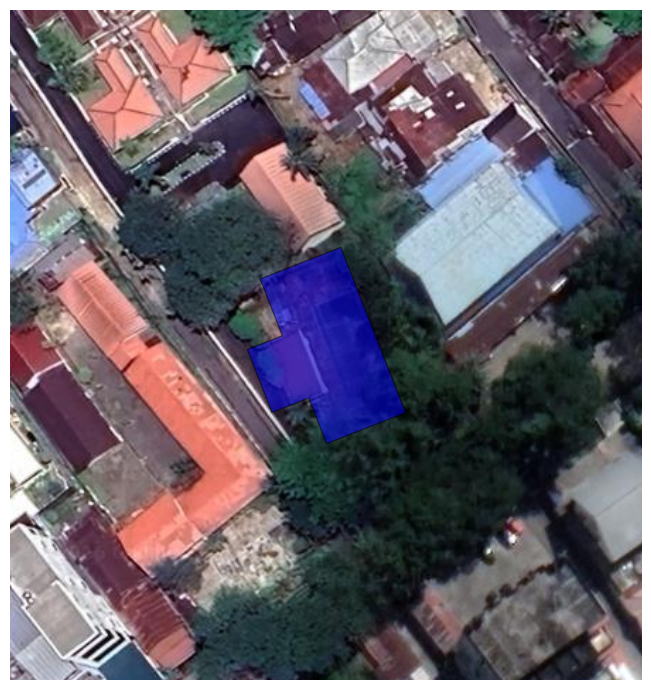

index 46159, gmaps = -0.05505,109.35078


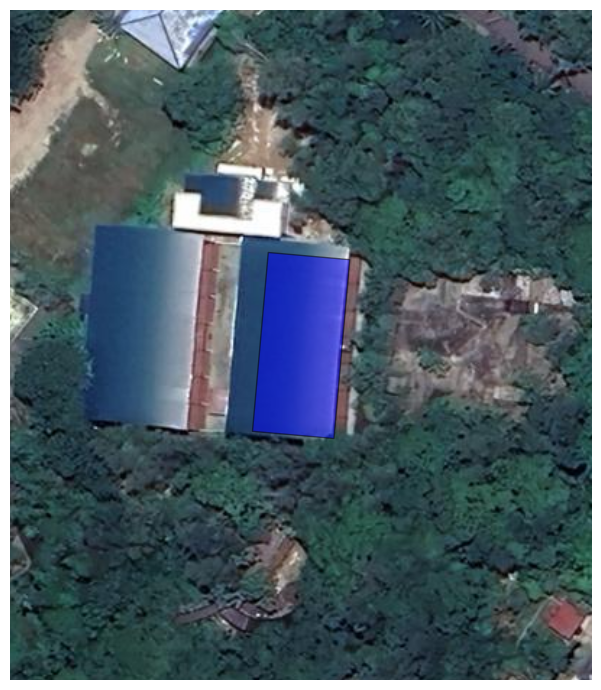

index 46160, gmaps = -0.05503,109.35047


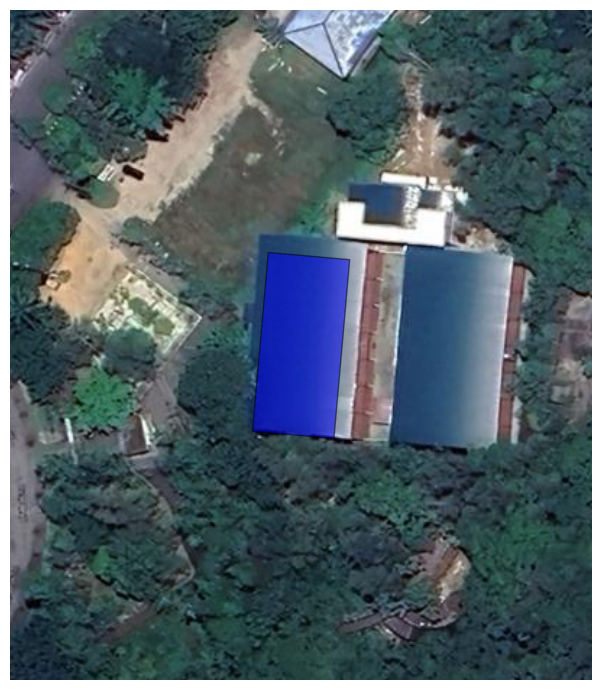

index 48552, gmaps = -0.05707,109.35157


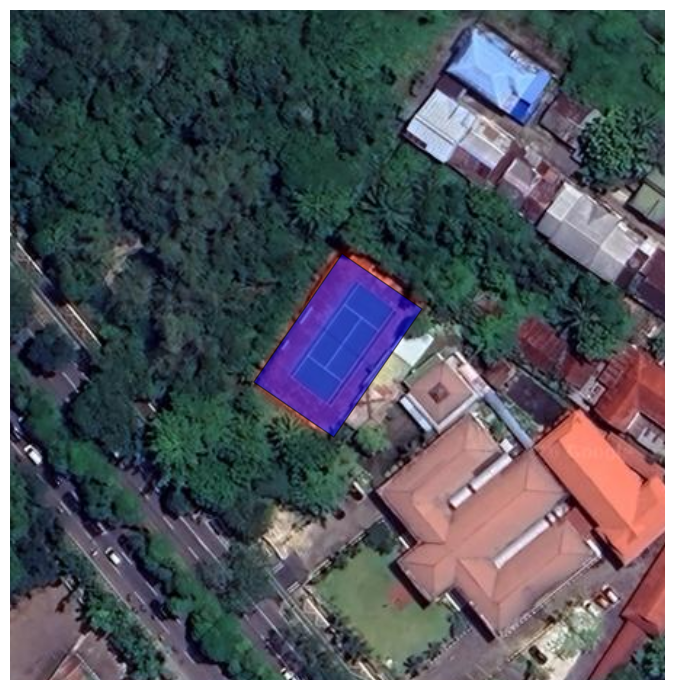

In [ ]:
import contextily as ctx
import matplotlib.pyplot as plt

ceks = gdf[gdf["Info"]=="tennis"]

padding = 50

for i in range(len(ceks)) :
  fig, ax = plt.subplots(figsize=(7,7))

  cek = gdf.iloc[[ceks.index[i]]]
  # Ensure data is in Web Mercator (Required for Google Tiles)
  gdf_proj = cek.to_crs(epsg=3857)

  # Plot your data
  gdf_proj.plot(
      ax=ax,
      color='blue',       # The fill color
      edgecolor='black',  # The outline color
      linewidth=1,        # Thickness of the outline
      alpha=0.5,          # Transparency (0.0 transparent through 1.0 solid)
      zorder=2            # Keep the building on top of the map
  )

  # Get the bounding box of the building [minx, miny, maxx, maxy]
  bounds = gdf_proj.geometry.total_bounds

  # Apply the padding to make the view wider
  ax.set_xlim(bounds[0] - padding, bounds[2] + padding)
  ax.set_ylim(bounds[1] - padding, bounds[3] + padding)

  # Add Google Satellite Basemap
  # lyrs=s : Satellite only
  # lyrs=y : Hybrid (Satellite + Labels/Roads)
  google_url = "https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}"

  ctx.add_basemap(ax, source=google_url, zoom=19)

  judul = cek.iloc[0]['gmaps']
  idx = judul.find(',')
  kiri = round(float(judul[:idx]),5)
  kanan = round(float(judul[idx+1:]),5)
  judul = f"{kiri},{kanan}"

  ax.set_axis_off()
  plt.tight_layout()
  print(f"index {ceks.index[i]}, gmaps = {judul}")
  plt.show()